In [497]:
import pandas as pd

x1 = pd.ExcelFile('celebrity_deaths_2016.xlsx')
print(x1.sheet_names)


['celeb_death', 'cause_of_death']


In [498]:
df = x1.parse('celeb_death')
top5 = df.head(5)
print(top5)


  date of death             name age  \
0    2016-01-01        Tony Lane  71   
1    2016-01-01   Gilbert Kaplan  74   
2    2016-01-01      Brian Johns  79   
3    2016-01-01  Natasha Aguilar  45   
4    2016-01-01     Fazu Aliyeva  83   

                                                 bio  cause_id  
0              American art director (Rolling Stone)    8915.0  
1                 American conductor and businessman    2860.0  
2  Australian company director, managing director...    2860.0  
3  Costa Rican swimmer, silver and bronze medalis...   33897.0  
4                   Russian Avar poet and journalist   10648.0  


c:\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [499]:
df_types = df.dtypes
df_shape = df.shape
print(df_types)
print(df_shape)


date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object
(6594, 5)


In [500]:
df = df.drop_duplicates()


In [501]:
cause_of_death = x1.parse('cause_of_death')
cause_top_5 = cause_of_death.head(5)
print(cause_top_5)


   cause_id cause of death
0       753            ALS
1      1039           bomb
2      1120           shot
3      1499           fall
4      1629           shot


c:\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [502]:
cause_of_death.drop_duplicates(subset='cause_id')


,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot
...,...,...
344,116752,injuries sustained in Brussels Airport bombings
345,119640,complications from a fall and Alzheimer's dis...
346,129613,complications from esophageal cancer and pneu...
347,133339,pneumonia as a complication from a kidney inf...


In [503]:
df = df.merge(cause_of_death, how='left', on='cause_id')
df_top5 = df.head(5)
print(df_top5)


  date of death             name age  \
0    2016-01-01        Tony Lane  71   
1    2016-01-01   Gilbert Kaplan  74   
2    2016-01-01      Brian Johns  79   
3    2016-01-01  Natasha Aguilar  45   
4    2016-01-01     Fazu Aliyeva  83   

                                                 bio  cause_id  \
0              American art director (Rolling Stone)    8915.0   
1                 American conductor and businessman    2860.0   
2  Australian company director, managing director...    2860.0   
3  Costa Rican swimmer, silver and bronze medalis...   33897.0   
4                   Russian Avar poet and journalist   10648.0   

               cause of death  
0                brain cancer  
1                      cancer  
2                      cancer  
3   complications of a stroke  
4               heart failure  


In [504]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').dropna()


In [505]:
avg_age = df['age'].mean()
print(avg_age)


76.99418159546777


In [506]:
count = len(df[df['age'] > 70].index)
print(count)


4760


In [507]:
df_youngest = df[df['age'] == df['age'].min()]
youngest_name = df_youngest.iloc[0]['name']
youngest_cause = df_youngest.iloc[0]['cause of death']
print(youngest_name)
print(youngest_cause)


Vautour
 euthanised


In [508]:
df['bio'] = df['bio'].astype(str)


In [509]:
df_american = df[df['bio'].str.contains('American')]
count_american = len(df_american.index)
print(count_american)


2143


In [510]:
import random
random.seed(0)

df_died_50 = df[
    (df['age'] == 50) &
    (df['cause of death'].notnull()) &
    (df['cause of death'].str.contains('unknown') == False)]
causes_of_death = df_died_50['cause of death'].unique()
rand_cause = causes_of_death[random.randint(0, causes_of_death.size - 1)]
print(rand_cause.strip())


traffic collision


In [511]:
import numpy as np

df_grouped_cause = df[['cause of death', 'age']
                      ].groupby('cause of death').mean()
print(df_grouped_cause)


                                                 age
cause of death                                      
 Alzheimer's disease                       79.590909
 Myself and I)                             76.000000
 Parkinson's disease                       80.200000
 Parkinson's disease and multiple myeloma  69.000000
 Pick's disease                            68.000000
...                                              ...
 plane crash                               55.500000
 progressive supranuclear palsy            84.000000
 shot                                      56.500000
 stabbed                                   85.000000
 tased                                     48.000000

[334 rows x 1 columns]


In [512]:
def get_month(date):
    return date.month


df['month'] = df.apply(lambda row: get_month(row['date of death']), 1)


In [513]:
def get_year(date):
    return date.year


df['year'] = df.apply(lambda row: get_year(row['date of death']), 1)


In [514]:
df_2016 = df[df['year'] == 2016]


In [515]:
df_per_month = df_2016.groupby(
    'month')['month'].count().reset_index(name='count')


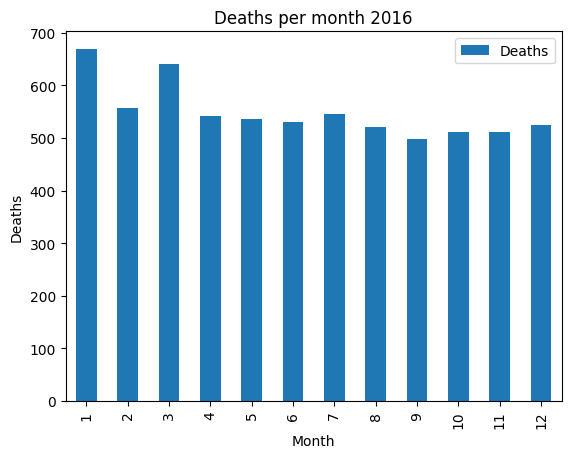

In [516]:
import matplotlib.pyplot as plt

ax = df_per_month.plot(x='month', y='count', kind='bar',
                       title='Deaths per month 2016')
ax.set_xlabel('Month')
ax.set_ylabel('Deaths')
ax.legend(['Deaths'])
plt.show()
